In [143]:
import numpy
import matplotlib
from scipy.interpolate import interp1d
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [144]:
def enveloppe(s):
    u_x = [] # do not add 0
    u_y = []
    q_u = np.zeros(s.shape)
    for k in range(1,len(s)-1):
        if (np.sign(s[k]-s[k-1])==1) and (np.sign(s[k]-s[k+1])==1):
            u_x.append(float(k))
            u_y.append(s[k])
#    print(u_x),len(u_x)
#    print day
    u_p = interp1d(u_x,u_y,fill_value="extrapolate") #,kind = 'cubic')#,fill_value="extrapolate")
#    u_p = interp1d(u_x,u_y, kind = 'linear',
#              bounds_error = False, 
#              fill_value="extrapolate") # use fill_value="extrapolate"
    for k in range(0,len(s)):
        q_u[k] = u_p(float(k+0.1))
    return q_u

In [145]:
data=loadtxt('Energy_2008(26-30)IRK.dat')
N=len(data[:,0])

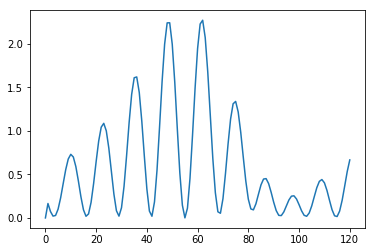

In [146]:
G=zeros(N)
Gh=zeros(N)
G=data[:,1]
day=data[:,0]
plot(day,G)
#print day


In [147]:
Gh= enveloppe(G)

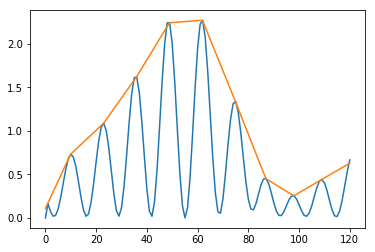

In [148]:
plot(day,G)
plot(day,Gh)

In [149]:
env = np.zeros(2*N).reshape(N,2)

for i in range(0,N):
    env[i,0] = day[i]
    env[i,1] = Gh[i]
savetxt('EnergyEnv_2008(26-30)IRK.dat', env)